# **Exploratory Data Analysis** # 

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("husl")


In [4]:
# Load the datasets
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')
links = pd.read_csv('data/links.csv')
tags = pd.read_csv('data/tags.csv')


In [5]:
df_names = ["movies", "ratings", "links", "tags"]
for df_name, df in zip(df_names, [movies, ratings, links, tags]):
    print(f"DataFrame: {df_name}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print(f"Columns: {df.columns.tolist()}")
    print("")


DataFrame: movies
Number of rows: 9742
Number of columns: 3
Columns: ['movieId', 'title', 'genres']

DataFrame: ratings
Number of rows: 100836
Number of columns: 4
Columns: ['userId', 'movieId', 'rating', 'timestamp']

DataFrame: links
Number of rows: 9742
Number of columns: 3
Columns: ['movieId', 'imdbId', 'tmdbId']

DataFrame: tags
Number of rows: 3683
Number of columns: 4
Columns: ['userId', 'movieId', 'tag', 'timestamp']



Index(['Comedy', 'Drama', 'Comedy|Romance', 'Comedy|Drama|Romance',
       'Comedy|Drama', 'Drama|Romance', 'Action|Adventure|Sci-Fi',
       'Crime|Drama', 'Action|Crime|Thriller', 'Action|Adventure|Thriller'],
      dtype='object', name='genres')

In [9]:
combined_df = pd.merge(movies, ratings, on='movieId', how='inner')
common_genres = combined_df.genres.value_counts().head(10).index

movies_from_common_genres = combined_df[combined_df['genres'].apply(
    lambda x: any(
        genre in x for genre in common_genres))]

print(f"Number of movies from common genres: {movies_from_common_genres.shape[0]}")
print(f"Number of movies from other genres: {combined_df.shape[0] - movies_from_common_genres.shape[0]}")

Number of movies from common genres: 79222
Number of movies from other genres: 21614


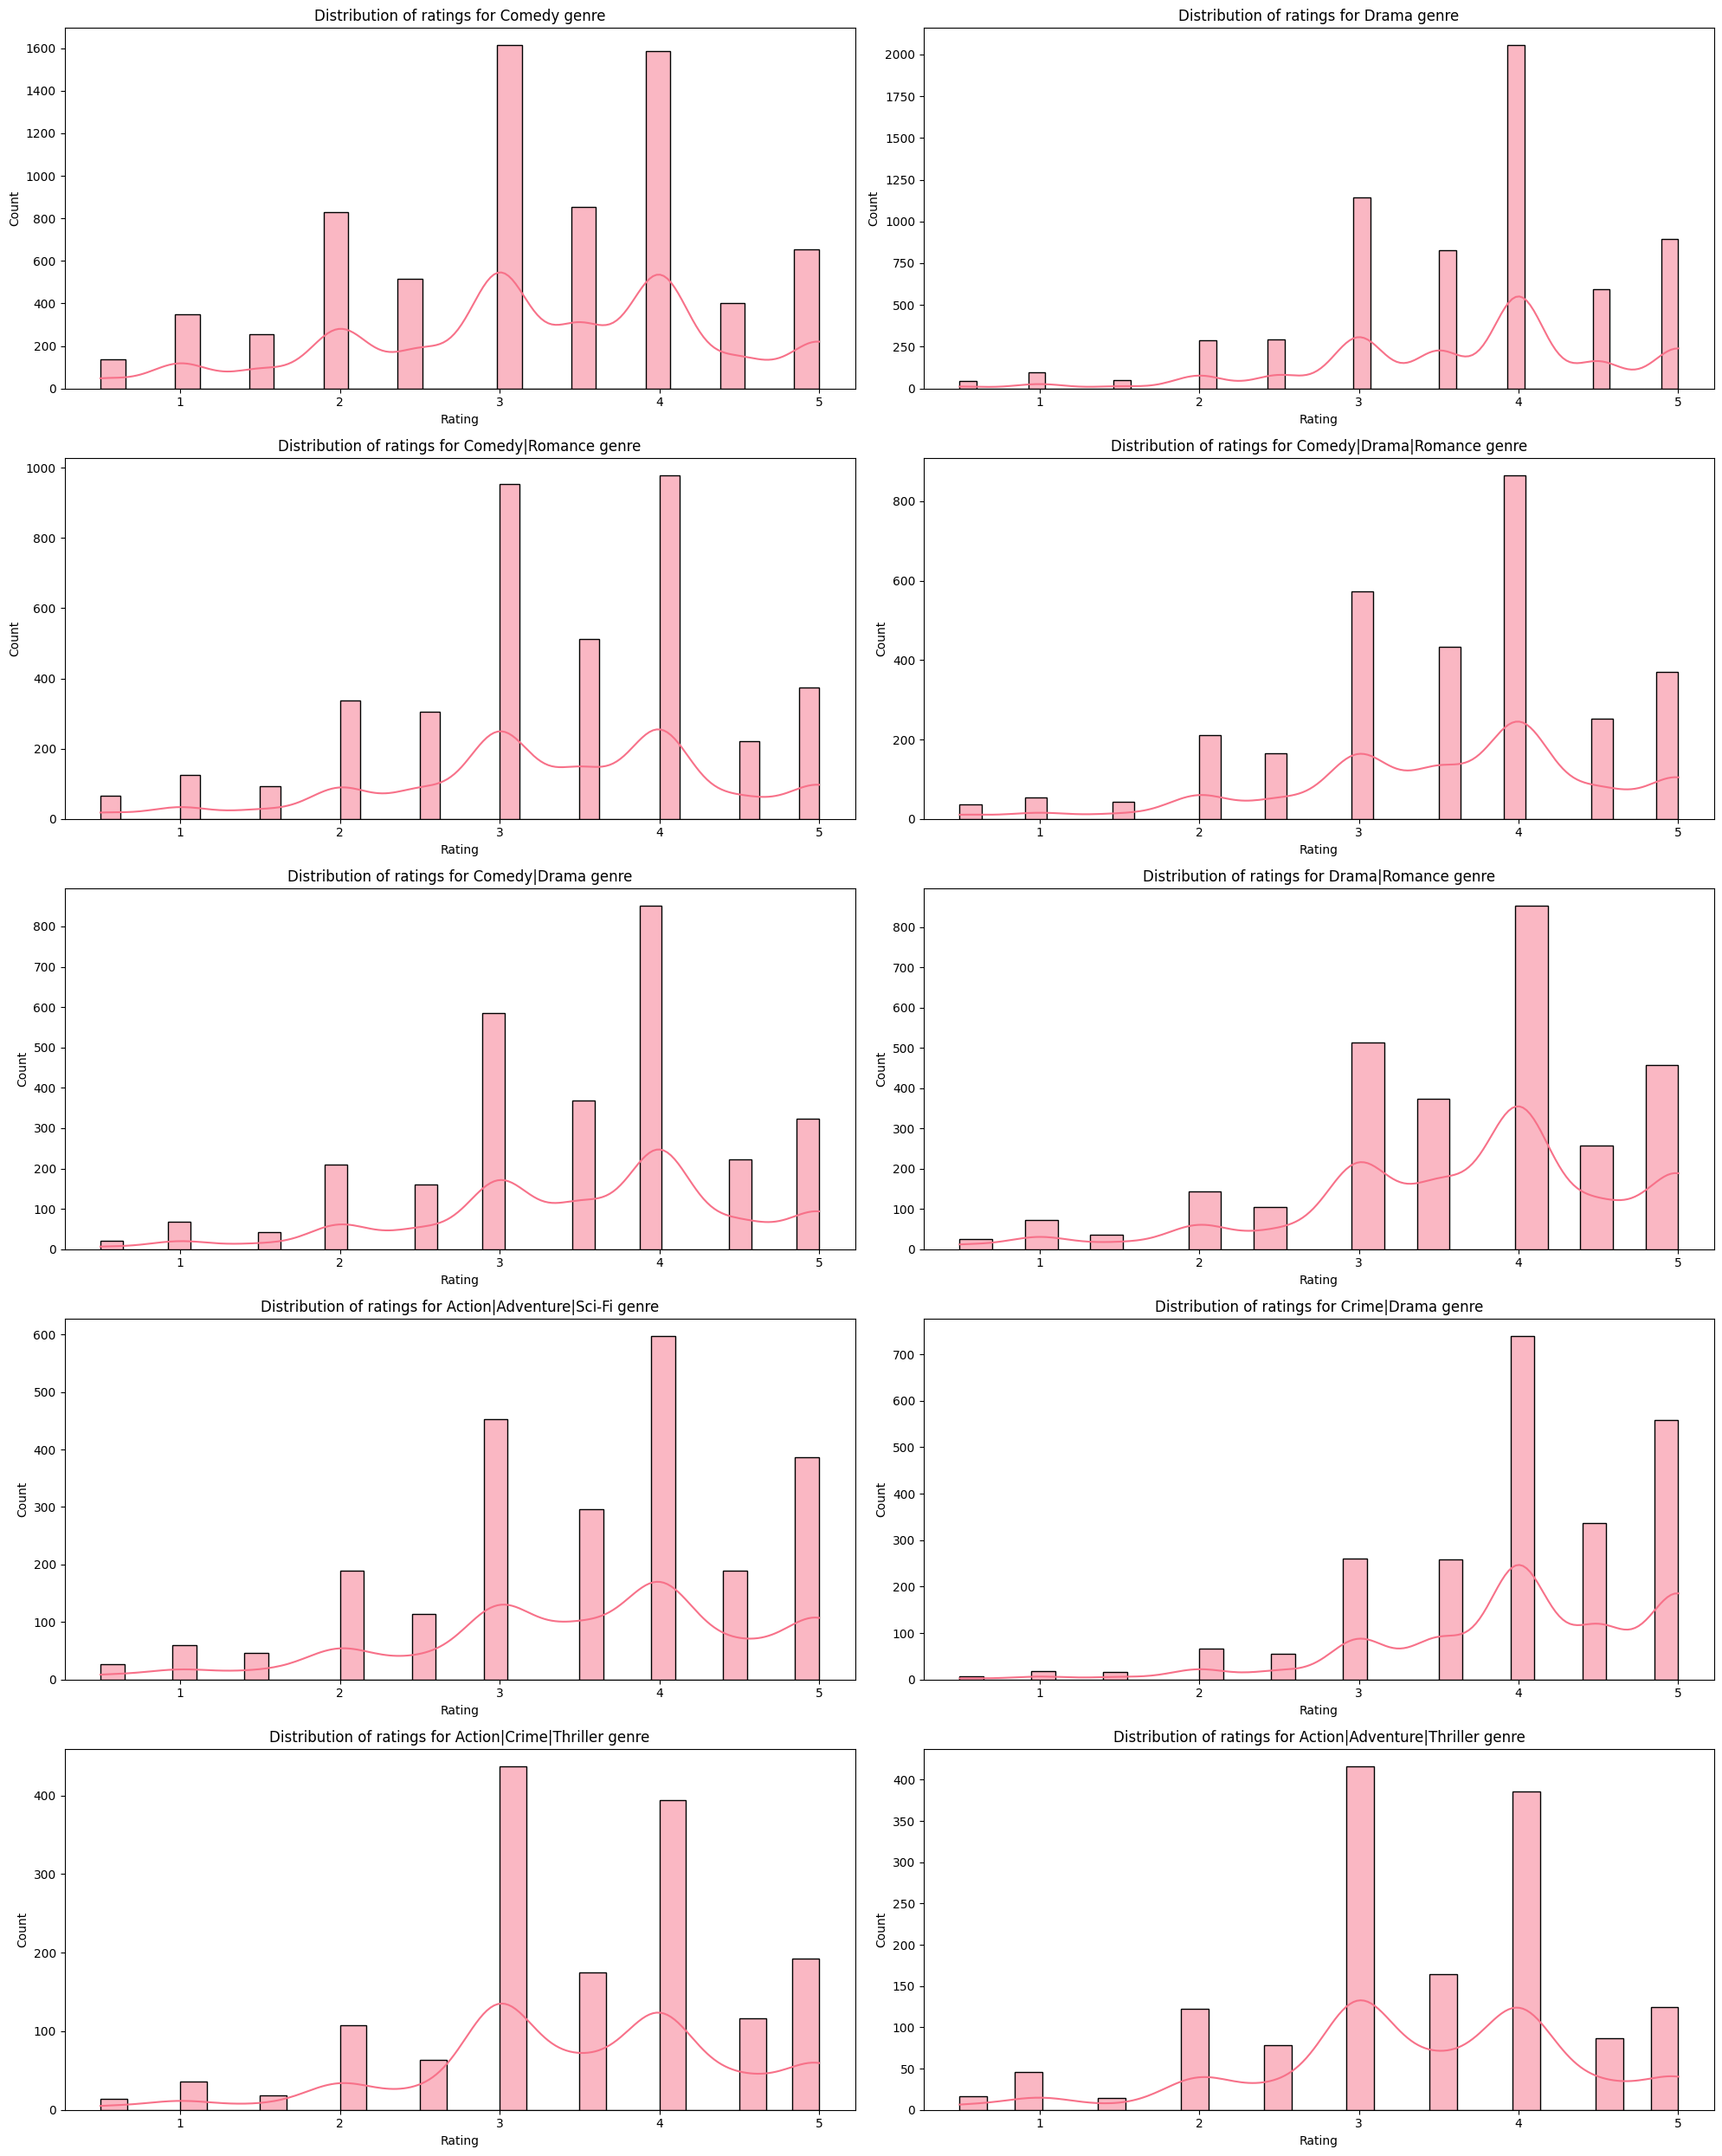

In [14]:

# Create subplots for all genres - 2 plots per row
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()  # Flatten the 2D array to 1D for easier indexing

for i, genre in enumerate(common_genres):
    sns.histplot(combined_df[combined_df['genres'] == genre]['rating'], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of ratings for {genre} genre')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for i in range(len(common_genres), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()